In [2]:
# Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook
sns.set_style("darkgrid")

In [3]:
# Loading dataset.
with open('session_tbs_list_all.pickle', 'rb') as handle:
    my_list = pickle.load(handle)

fn = 'session_start_end_time_top_rnti.pickle'
with open(fn, 'rb') as handle:
    df_session = pickle.load(handle)

In [4]:
# Removing NaNs or empty values from the initial dataset
dataset = []
for sess in my_list:
    if len(sess) != 0:
        if ~np.isnan(np.sum(sess)):
            dataset.append(sess)

<IPython.core.display.Javascript object>


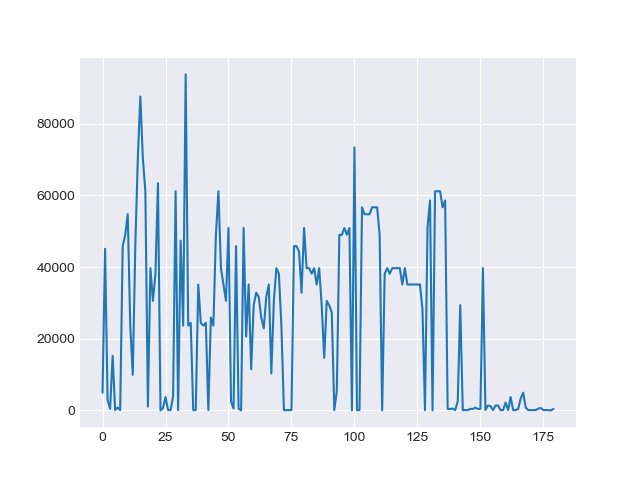

In [5]:
# Figure: plotting an example session trace
plt.figure()
plt.plot(my_list[1172])

In [34]:
#  Extracting features: session length, avg_tbs, std_tbs, total sent TBS
# Building a py list with session lengths (number of samples)
sess_length = []
sess_avg_tbs = []
sess_std_tbs = []
sess_tot_tbs = []
sess_med_tbs = []
sess_skew_tbs = []
sess_kurtosis_tbs = []

for sess in dataset:
    sess_length.append(len(sess))
    sess_avg_tbs.append(np.mean(sess))
    sess_std_tbs.append(np.std(sess))
    sess_tot_tbs.append(sum(sess))
    sess_med_tbs.append(np.median(sess))
    sess_skew_tbs.append(skew(sess))
    sess_kurtosis_tbs.append(kurtosis(sess))
    
# Creating the dataFrame
features = {'sess_length': sess_length, 'sess_avg_tbs': sess_avg_tbs, 'sess_std_tbs':sess_std_tbs, 
            'sess_tot_tbs':sess_tot_tbs, 'sess_med_tbs':sess_med_tbs, 'sess_skew_tbs':sess_skew_tbs, 'sess_kurtosis_tbs':sess_kurtosis_tbs}
df_features = pd.DataFrame(data=features)
    

In [46]:
df_features.index[df_features['labels'] == 3].tolist()

[7692, 9124, 9596, 10956, 14780, 14782, 14783]

## __PLOTTING__

<IPython.core.display.Javascript object>


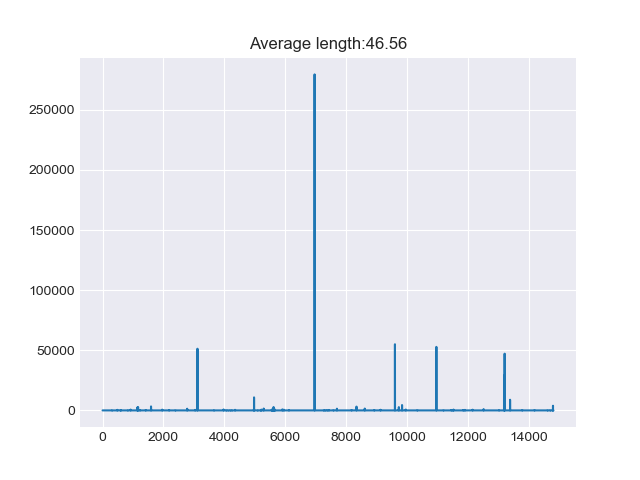

Text(0.5,1,'Average length:46.56')

In [11]:
# Figure: plotting the length of each session
plt.figure()
plt.plot(sess_length)
plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )

# histogram
# plt.figure()
# plt.hist(sess_length, range=(np.min(sess_length), np.max(sess_length) ) )
# plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )


<IPython.core.display.Javascript object>


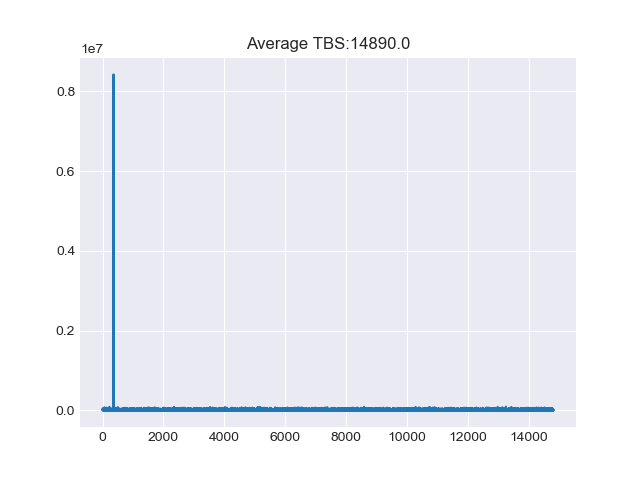

Text(0.5,1,'Average TBS:14890.0')

In [10]:
# Figure: plotting the Transpot Block Size (Packet size) -> Data rate
plt.figure()
plt.plot(sess_avg_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_avg_tbs) ) ) )

<IPython.core.display.Javascript object>


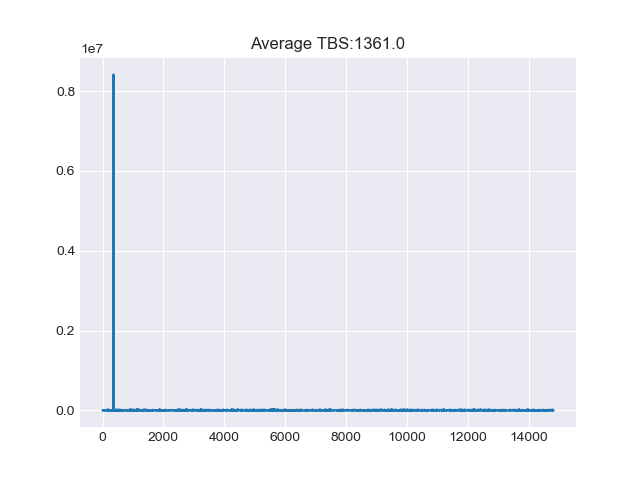

Text(0.5,1,'Average TBS:1361.0')

In [11]:
# Figure: plotting the std TBS
plt.figure()
plt.plot(sess_std_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_std_tbs) ) ) )

<IPython.core.display.Javascript object>


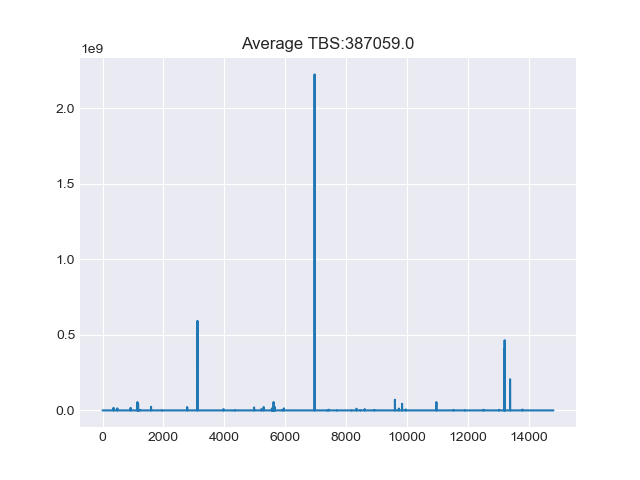

Text(0.5,1,'Average TBS:387059.0')

In [12]:
# Figure: plotting the total sent TBS
plt.figure()
plt.plot(sess_tot_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_tot_tbs) ) ) )

## __CLUSTERING__

<IPython.core.display.Javascript object>


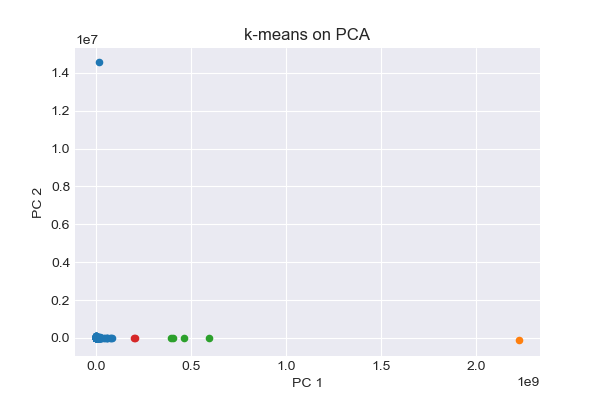

In [36]:
# Computing k-means on the feature vector

# Standardizing the features
x = StandardScaler().fit_transform(df_features)
#x = df_features

# k-means
num_cluster = 4
est = KMeans(n_clusters=num_cluster)
est.fit(x)
df_features['labels'] = est.labels_

# Computing k-means on PCA over the feature vector

# PCA
x = df_features
n_comps = 3
pca = PCA(n_components=n_comps)
principalComponents = pca.fit_transform(x)
cols = ['pc' + str(ind+1) for ind in range(n_comps)]
df_pca = pd.DataFrame(data = principalComponents, columns = cols)

# k-means
num_cluster = 4
est_pca = KMeans(n_clusters=num_cluster)
est_pca.fit(df_pca)
labels_pca = est_pca.labels_
df_pca['labels'] = labels_pca

# plot
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('k-means on PCA')

for ind in set(df_pca['labels']):
    indicesToKeep = df_pca['labels'] == ind
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
                   , df_pca.loc[indicesToKeep, 'pc2']
                   , s = 20
                   )